# Objective and Motivation

## Objective

## Overview of Wind Turbine Anatomy

## Wind Turbine Aerodynamics

# Code

### Pip Install, Init, and Start Pyspark

In [899]:
# from pyspark.sql import SparkSession
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# from pyspark.sql import functions as F
# from pyspark.sql import types as T
# from pyspark.sql.functions import broadcast
# from pyspark.sql.functions import col
# from pyspark.sql.functions import *
import seaborn as sns

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [900]:
# from ydata_profiling import ProfileReport

In [901]:
# spark = SparkSession.builder.master("local[*]").getOrCreate()
# sc = spark.sparkContext

In [902]:
# Get the number of cores
# num_cores = sc.defaultParallelism

# Get the number of executors
# num_executors = sc.getConf().get("spark.executor.instances")

# print(num_cores)
# print(num_executors)

In [903]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

### Import Data 

In [904]:
print(os.getcwd())

/home/mathewlee/Developer/wind-energy-forecasting/notebooks


In [905]:
df = pd.read_csv("../src/main/resources/data/Turbine_Data.csv")

In [906]:
# df = (spark.read
#       .option("header", "true")
#       .option("inferSchema", "true")
#       .csv("../data/Turbine_Data.csv"))

In [907]:
# df.printSchema()

### Transform Data

In [908]:
# df_renamed = df.withColumnRenamed("_c0", "datetime_stamp")


In [909]:
df_renamed = df.rename({"Unnamed: 0": "datetime_stamp"}, axis=1)

In [910]:
df_renamed.columns

Index(['datetime_stamp', 'ActivePower', 'AmbientTemperatue',
       'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle',
       'Blade3PitchAngle', 'ControlBoxTemperature',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WTG', 'WindDirection',
       'WindSpeed'],
      dtype='object')

In [911]:
df_renamed['datetime_stamp'] = pd.to_datetime(df_renamed['datetime_stamp'])

In [912]:
df_indexed_sorted = df_renamed.set_index("datetime_stamp").sort_index()

In [913]:
df_indexed_sorted.dtypes

ActivePower                     float64
AmbientTemperatue               float64
BearingShaftTemperature         float64
Blade1PitchAngle                float64
Blade2PitchAngle                float64
Blade3PitchAngle                float64
ControlBoxTemperature           float64
GearboxBearingTemperature       float64
GearboxOilTemperature           float64
GeneratorRPM                    float64
GeneratorWinding1Temperature    float64
GeneratorWinding2Temperature    float64
HubTemperature                  float64
MainBoxTemperature              float64
NacellePosition                 float64
ReactivePower                   float64
RotorRPM                        float64
TurbineStatus                   float64
WTG                              object
WindDirection                   float64
WindSpeed                       float64
dtype: object

In [914]:
pdf = df_indexed_sorted.copy()

In [915]:
# df_casted = df_renamed.withColumn("datetime_stamp", col("datetime_stamp").cast("timestamp")).drop(col("_c0"))
# df_casted.printSchema()

In [916]:
# df_filtered = df_casted.where(
#     to_date(col("datetime_stamp")) =="2018-01-01"
#     )

In [917]:
# pdf = df_casted.toPandas()

In [918]:
# profile = ProfileReport(pdf, title="YData Profiling Report")
# profile.to_file('profiling_report.html');

### Drop Empty or Single Value Cols

In [919]:
pdf_drop_bad_cols = pdf.drop(columns=['ControlBoxTemperature', 'TurbineStatus', 'WTG'], axis=1)

In [920]:
type(pdf_drop_bad_cols)

pandas.core.frame.DataFrame

### Drop Highly Correlated Columns

In [921]:
corr_matrix = pdf_drop_bad_cols.corr()
corr_matrix


,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,WindDirection,WindSpeed
ActivePower,1.000000,-0.065637,0.655400,-0.368997,-0.367978,-0.367978,0.818850,0.821921,0.849604,0.931390,0.932521,0.347363,0.101627,0.028108,0.719092,0.849069,0.028108,0.940390
AmbientTemperatue,-0.065637,1.000000,0.246505,0.085461,0.090904,0.090904,0.017216,0.162511,-0.130123,0.077859,0.078736,0.589729,0.836539,-0.037498,-0.020313,-0.129290,-0.037498,-0.095308
BearingShaftTemperature,0.655400,0.246505,1.000000,-0.475557,-0.466856,-0.466856,0.883344,0.772887,0.640947,0.765115,0.763926,0.809116,0.542104,0.183929,0.594546,0.640584,0.183929,0.596201
Blade1PitchAngle,-0.368997,0.085461,-0.475557,1.000000,0.997774,0.997774,-0.599178,-0.557949,-0.757056,-0.376102,-0.372369,-0.198583,0.194911,-0.058300,-0.381478,-0.757147,-0.058300,-0.403092
Blade2PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.057624,-0.402786
Blade3PitchAngle,-0.367978,0.090904,-0.466856,0.997774,1.000000,1.000000,-0.592103,-0.549792,-0.754325,-0.371057,-0.367451,-0.190296,0.190562,-0.057624,-0.379541,-0.754539,-0.057624,-0.402786
GearboxBearingTemperature,0.818850,0.017216,0.883344,-0.599178,-0.592103,-0.592103,1.000000,0.906020,0.850209,0.853024,0.851923,0.596065,0.307694,0.214486,0.751875,0.850795,0.214486,0.800433
GearboxOilTemperature,0.821921,0.162511,0.772887,-0.557949,-0.549792,-0.549792,0.906020,1.000000,0.806972,0.899693,0.898335,0.506648,0.190350,0.277619,0.770088,0.807776,0.277619,0.793140
GeneratorRPM,0.849604,-0.130123,0.640947,-0.757056,-0.754325,-0.754325,0.850209,0.806972,1.000000,0.796434,0.795223,0.303804,-0.052185,0.176964,0.768065,0.999723,0.176964,0.854787
GeneratorWinding1Temperature,0.931390,0.077859,0.765115,-0.376102,-0.371057,-0.371057,0.853024,0.899693,0.796434,1.000000,0.999959,0.481905,0.215955,0.298452,0.838461,0.797077,0.298452,0.894777


In [922]:
corr_matrix.abs().unstack()["NacellePosition"]

ActivePower                     0.028108
AmbientTemperatue               0.037498
BearingShaftTemperature         0.183929
Blade1PitchAngle                0.058300
Blade2PitchAngle                0.057624
Blade3PitchAngle                0.057624
GearboxBearingTemperature       0.214486
GearboxOilTemperature           0.277619
GeneratorRPM                    0.176964
GeneratorWinding1Temperature    0.298452
GeneratorWinding2Temperature    0.298708
HubTemperature                  0.128150
MainBoxTemperature              0.005701
NacellePosition                 1.000000
ReactivePower                   0.294038
RotorRPM                        0.176511
WindDirection                   1.000000
WindSpeed                       0.034355
dtype: float64

In [923]:
corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

WindSpeed                     WindSpeed                       1.000000
GeneratorWinding2Temperature  GeneratorWinding1Temperature    0.999959
GeneratorRPM                  RotorRPM                        0.999723
Blade3PitchAngle              Blade1PitchAngle                0.997774
WindSpeed                     ActivePower                     0.940390
ActivePower                   GeneratorWinding2Temperature    0.932521
                              GeneratorWinding1Temperature    0.931390
GearboxBearingTemperature     GearboxOilTemperature           0.906020
GearboxOilTemperature         GeneratorWinding1Temperature    0.899693
                              GeneratorWinding2Temperature    0.898335
WindSpeed                     GeneratorWinding2Temperature    0.894834
                              GeneratorWinding1Temperature    0.894777
GearboxBearingTemperature     BearingShaftTemperature         0.883344
RotorRPM                      WindSpeed                       0.855584
Genera

In [924]:
### Drop highly correlated features
### pdf[["WindSpeed","ActivePower"]]
### pdf[["RotorRPM", "GeneratorRPM"]]
### pdf[["AmbientTemperatue", "MainBoxTemperature"]]
### pdf[["Blade1PitchAngle","Blade2PitchAngle", "Blade3PitchAngle"]]
### pdf[["NacellePosition","WindDirection"]]


df_drop_corr_cols = pdf.drop(["NacellePosition","RotorRPM", "AmbientTemperatue", "Blade2PitchAngle", "Blade3PitchAngle"], axis=1)


In [925]:
df_drop_corr_cols

,ActivePower,BearingShaftTemperature,Blade1PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,ReactivePower,TurbineStatus,WTG,WindDirection,WindSpeed
datetime_stamp,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,45.711129,1.515669,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,13.775785,2.0,G01,178.0,3.533445
2020-03-30 23:20:00+00:00,40.833474,45.598573,1.702809,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,8.088928,2.0,G01,178.0,3.261231
2020-03-30 23:30:00+00:00,20.777790,45.462045,1.706214,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,4.355978,2.0,G01,178.0,3.331839


### Drop Null Rows

In [926]:
# df_drop_nulls = df_drop_corr_cols.dropna().sort_index()
df_drop_nulls = df_drop_corr_cols.sort_index()

In [927]:
### Percent non-null
df_drop_nulls.shape[0]/pdf.shape[0]

1.0

### Train/Test Split

In [928]:
import sklearn
from sklearn.model_selection import train_test_split

# Example usage: splitting features (X) and target (y)
X_train, X_test = train_test_split(df_drop_nulls, test_size=0.2, random_state=42)



### Aggregate hourly to daily (Power)

In [969]:
ser_active_power = X_train["ActivePower"].resample('ME').sum()
# ser_active_power = df_drop_nulls["ActivePower"].resample('D').sum()

### Plot the timeseries

In [970]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.tools import diff


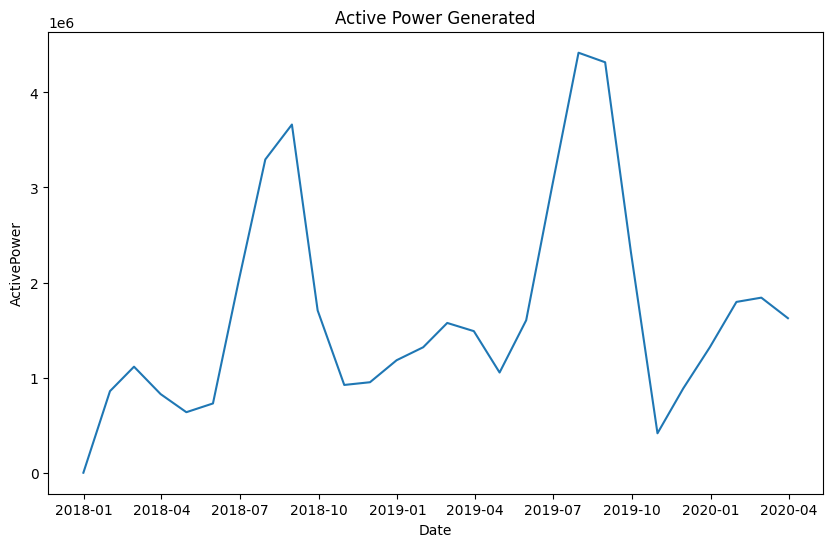

In [971]:
plt.figure(figsize=(10, 6))
plt.plot(ser_active_power)
plt.title("Active Power Generated")
plt.xlabel("Date")
plt.ylabel("ActivePower")
plt.show()

### Check Stationarity, ACF, and PACF

In [932]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(ser_active_power)

ADF Statistic: -3.91463983640059
p-value: 0.0019297090622499137
Stationary


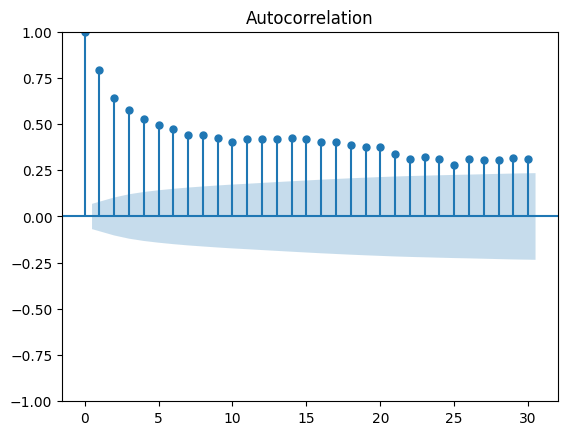

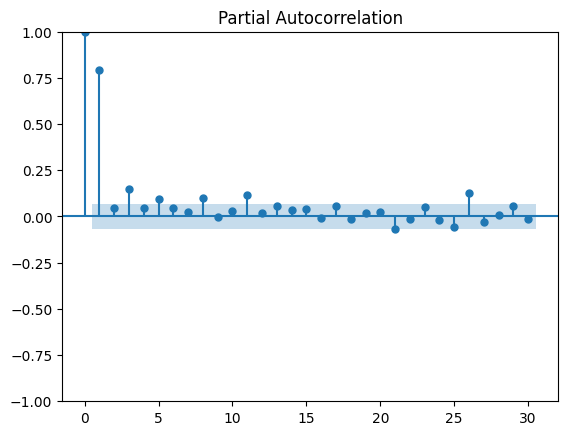

In [933]:
plot_acf(ser_active_power)
plot_pacf(ser_active_power)
plt.show()

### Differencing

In [934]:
ser_active_power_diffed = diff(ser_active_power, k_seasonal_diff=1, seasonal_periods=12)
# ser_active_power_diffed = diff(ser_active_power_filtered)

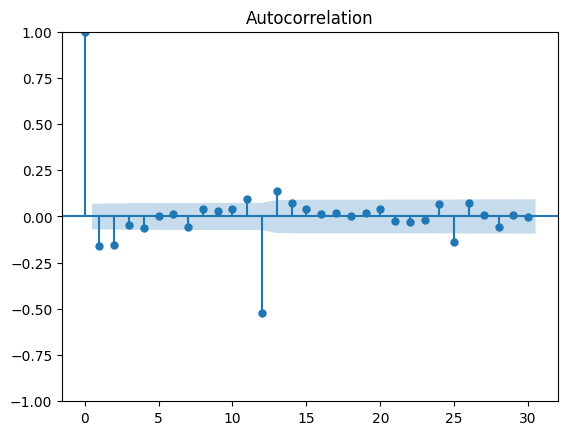

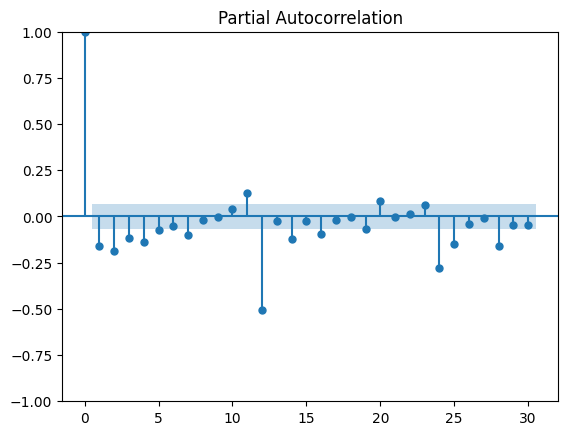

In [935]:
plot_acf(ser_active_power_diffed)
plot_pacf(ser_active_power_diffed)
plt.show()

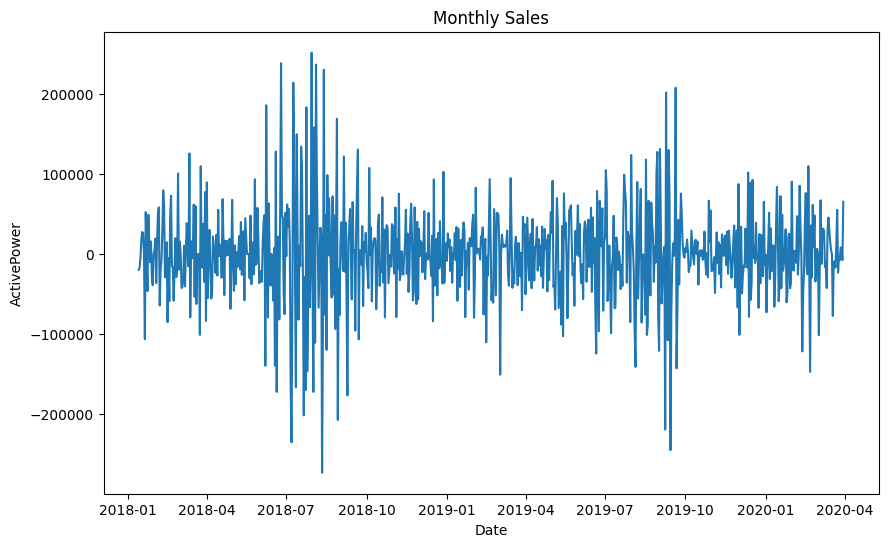

In [936]:
plt.figure(figsize=(10, 6))
plt.plot(ser_active_power_diffed)
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("ActivePower")
plt.show()

### Fit and Forecast (SARIMA)

In [965]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

model = SARIMAX(ser_active_power_diffed, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

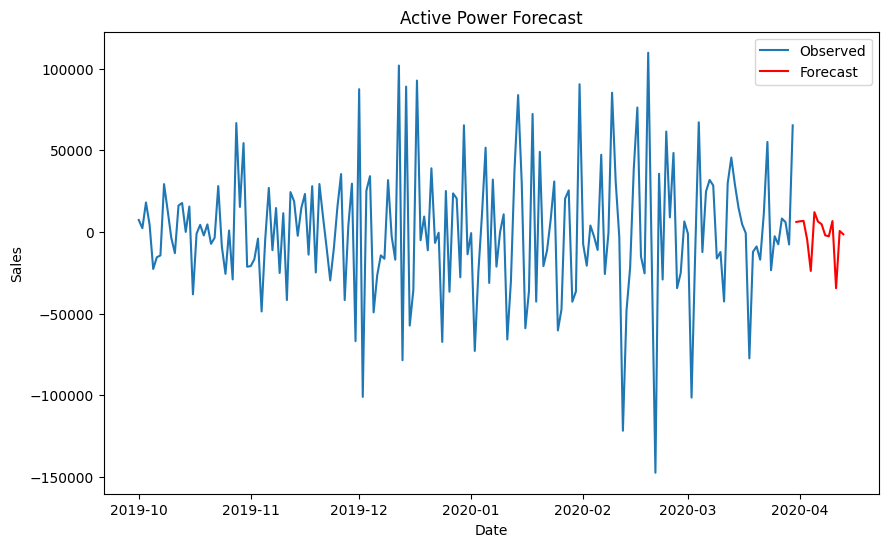

In [967]:
forecast_periods = 14
forecast = results.forecast(steps=forecast_periods)
forecast_mean = forecast.mean

plt.figure(figsize=(10, 6))
plt.plot(ser_active_power_diffed.loc[ser_active_power_diffed.index >= '2019-10-01'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Active Power Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### Evaluate the Model

In [939]:
# observed = ser_active_power_filtered[-forecast_periods:]
# mae = mean_absolute_error(observed, forecast_mean)
# mse = mean_squared_error(observed, forecast_mean)
# print(f'MAE: {mae}')
# print(f'MSE: {mse}')

## Sources

https://www.geeksforgeeks.org/machine-learning/sarima-seasonal-autoregressive-integrated-moving-average/